# **Spotify Song Clustering**

<img src="playlist.JPG">

In this project, I will try to cluster songs from Spotify playlists based on their song feature data. I use a playlist that Spotify created and in that playlist doesn't have a specific genre, I used the "Best of the decade for you" playlist. The KMeans clustering will be used as the machine learning algorithm, beacuse it is simple and easy to understand.

# **Tools**

1. Jupyter Notebook
2. Spotify App in Spotify Developer
3. Spotipy Library
4. Pandas, Seaborn, Matplotlib
5. Scikit-learn

# **Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.cluster import KMeans

# **Connect to spotify API**

In [2]:
client_id = '1ddd57098bc5457aad92a39c29a1700b'
client_secret = 'ffff8ed1d8b7467dbc8071be5381620b'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# **Get the Song**

**Get Track IDs**

In [3]:
def show_tracks(results, uriArray):
    for i, item in enumerate(results['items']):
        track = item['track']
        uriArray.append(track['id'])

In [4]:
def track_id(username, playlist_id):
    trackID = []
    results = sp.user_playlist(username, playlist_id)
    tracks = results['tracks']
    show_tracks(tracks, trackID)
    while tracks['next']:
        tracks = sp.next(tracks)
        show_tracks(tracks, trackID)
    return trackID

**Get Track Features data**

In [5]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, 
             acousticness, danceability, energy, instrumentalness, liveness, loudness, 
             speechiness, tempo, time_signature]
    return track

**Main**

In [6]:
def main_func(playlist_creator, playlist_uri, filename):
    ids = track_id(playlist_creator, playlist_uri)
    
    # get track by track ids
    tracks = []
    for i in range(len(ids)):
        track = getTrackFeatures(ids[i])
        tracks.append(track)
        dff = pd.DataFrame(tracks, columns = [
            'name', 'album', 'artist', 'release_date', 'length', 'popularity', 
            'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
            'speechiness', 'tempo', 'time_signature'])
        
        # save to csv
        dff.to_csv(filename+".csv", sep = ',', index=False)
    return dff

**How to get spotify playlist username/creator and playlist uri? Just look at this picture below**

<img src="playlist_uri.jpg">

https://open.spotify.com/playlist/37i9dQZF1DWXADZ9KRTmmm?si=d90c2cfa03db41b4

https://open.spotify.com/playlist/ 37i9dQZF1DWXADZ9KRTmmm ?si=d90c2cfa03db41b4
1. Username/playlist creator is on spotify web player
2. Click copy link to playlist
3. Between the whitespace is spotify uri

In [7]:
# 1st playlist uri 37i9dQZF1DXaMu9xyX1HzK
# 2nd playlist uri 37i9dQZF1DWXADZ9KRTmmm
# main_func(playlist_creator, playlist_uri, filename)

In [8]:
df1 = main_func('Spotify', '37i9dQZF1DXaMu9xyX1HzK', 'playlist_1')

In [9]:
df2 = main_func('Spotify', '37i9dQZF1DWXADZ9KRTmmm', 'playlist_2')

**Import the playlist**

For the record I use two playlist for this project, 1st uri and 2nd uri.

In [10]:
df1 = pd.read_csv('playlist_1.csv')

In [11]:
df1.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Blank Space,1989,Taylor Swift,2014-01-01,231826,67,0.0850,0.752,0.678,0.000002,0.130,-5.421,0.0646,96.009,4
1,Starving,Starving,Hailee Steinfeld,2016-07-22,181880,77,0.3780,0.728,0.616,0.000000,0.105,-4.238,0.0645,99.962,4
2,Story of My Life,Midnight Memories (Deluxe),One Direction,2013-11-25,245493,82,0.2250,0.600,0.663,0.000000,0.119,-5.802,0.0477,121.070,4
3,I Like Me Better,I met you when I was 18. (the playlist),Lauv,2018-05-31,197436,83,0.5350,0.752,0.505,0.000003,0.104,-7.621,0.2530,91.970,4
4,Scars To Your Beautiful,Know-It-All (Deluxe),Alessia Cara,2015-11-13,230226,73,0.0285,0.573,0.739,0.000000,0.111,-5.740,0.1290,97.085,4


In [12]:
df2 = pd.read_csv('playlist_2.csv')

In [13]:
df2.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Payphone,Overexposed Track By Track,Maroon 5,2012-01-01,231173,83,0.0188,0.743,0.752,0.0,0.287,-4.813,0.0414,110.015,4
1,Story of My Life,Midnight Memories (Deluxe),One Direction,2013-11-25,245493,82,0.2250,0.600,0.663,0.0,0.119,-5.802,0.0477,121.070,4
2,Treat You Better,Illuminate,Shawn Mendes,2017-04-20,187973,83,0.1060,0.444,0.819,0.0,0.107,-4.078,0.3410,82.695,4
3,Closer,Closer,The Chainsmokers,2016-07-29,244960,85,0.4140,0.748,0.524,0.0,0.111,-5.599,0.0338,95.010,4
4,Scars To Your Beautiful,Know-It-All (Deluxe),Alessia Cara,2016-03-11,230226,80,0.0285,0.319,0.739,0.0,0.111,-5.740,0.2720,194.169,4


# **Data Preparation**

**Concatinating two playlists**

In [14]:
df = pd.concat([df1,df2], axis=0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 199
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              300 non-null    object 
 1   album             300 non-null    object 
 2   artist            300 non-null    object 
 3   release_date      300 non-null    object 
 4   length            300 non-null    int64  
 5   popularity        300 non-null    int64  
 6   acousticness      300 non-null    float64
 7   danceability      300 non-null    float64
 8   energy            300 non-null    float64
 9   instrumentalness  300 non-null    float64
 10  liveness          300 non-null    float64
 11  loudness          300 non-null    float64
 12  speechiness       300 non-null    float64
 13  tempo             300 non-null    float64
 14  time_signature    300 non-null    int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 37.5+ KB


**Check redudancy data**

In [16]:
duplicate = pd.concat(g for _, g in df.groupby('name') if len(g) > 1)

In [17]:
duplicate

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
68,7 rings,"thank u, next",Ariana Grande,2019-02-08,178626,85,0.59200,0.778,0.317,0.000000,0.0881,-10.732,0.3340,140.048,4
133,7 rings,7 rings,Ariana Grande,2019-01-18,178640,2,0.57800,0.725,0.321,0.000000,0.0884,-10.744,0.3230,70.142,4
78,All of Me,Love In The Future (Expanded Edition),John Legend,2013-08-30,269560,86,0.92200,0.422,0.264,0.000000,0.1320,-7.064,0.0322,119.930,4
108,All of Me,Love In The Future (Expanded Edition),John Legend,2013-08-30,269560,86,0.92200,0.422,0.264,0.000000,0.1320,-7.064,0.0322,119.930,4
15,Baby,My World 2.0,Justin Bieber,2010-01-01,214240,80,0.04010,0.728,0.859,0.000000,0.1110,-5.237,0.1370,65.043,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,You Need To Calm Down,You Need To Calm Down,Taylor Swift,2019-06-14,171386,20,0.00838,0.768,0.678,0.000000,0.0596,-5.604,0.0505,85.025,4
16,Youngblood,Youngblood (Deluxe),5 Seconds of Summer,2018-06-15,203417,81,0.01690,0.596,0.854,0.000000,0.1240,-5.114,0.4630,120.274,4
21,Youngblood,Youngblood (Deluxe),5 Seconds of Summer,2018-06-15,203417,81,0.01690,0.596,0.854,0.000000,0.1240,-5.114,0.4630,120.274,4
82,no tears left to cry,Sweetener,Ariana Grande,2018-08-17,205920,79,0.04000,0.699,0.713,0.000003,0.2940,-5.507,0.0594,121.993,4


**Sort df by name**

In [18]:
df = df.sort_values('name')

In [19]:
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
5,2002,Speak Your Mind (Deluxe),Anne-Marie,2018-04-27,186986,82,0.0372,0.697,0.683,0.000000,0.1370,-2.881,0.1170,96.133,4
189,2U (feat. Justin Bieber),7,David Guetta,2018-09-14,194893,62,0.2340,0.534,0.613,0.000000,0.2270,-7.410,0.0591,144.878,4
163,7 Years,Lukas Graham (Blue Album),Lukas Graham,2015-06-16,237300,52,0.2900,0.742,0.479,0.000000,0.3910,-5.830,0.0551,119.951,4
68,7 rings,"thank u, next",Ariana Grande,2019-02-08,178626,85,0.5920,0.778,0.317,0.000000,0.0881,-10.732,0.3340,140.048,4
133,7 rings,7 rings,Ariana Grande,2019-01-18,178640,2,0.5780,0.725,0.321,0.000000,0.0884,-10.744,0.3230,70.142,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Youngblood,Youngblood (Deluxe),5 Seconds of Summer,2018-06-15,203417,81,0.0169,0.596,0.854,0.000000,0.1240,-5.114,0.4630,120.274,4
154,Your Song,Phoenix (Deluxe Edition),Rita Ora,2018-11-23,180160,64,0.1330,0.853,0.571,0.000000,0.0564,-5.845,0.0543,117.991,4
122,no tears left to cry,Sweetener,Ariana Grande,2018-08-17,205920,79,0.0400,0.699,0.713,0.000003,0.2940,-5.507,0.0594,121.993,4
82,no tears left to cry,Sweetener,Ariana Grande,2018-08-17,205920,79,0.0400,0.699,0.713,0.000003,0.2940,-5.507,0.0594,121.993,4


**Drop duplicate song**

In [20]:
df = df.drop_duplicates(subset='name') #default keep: first

In [21]:
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
5,2002,Speak Your Mind (Deluxe),Anne-Marie,2018-04-27,186986,82,0.03720,0.697,0.683,0.000000,0.1370,-2.881,0.1170,96.133,4
189,2U (feat. Justin Bieber),7,David Guetta,2018-09-14,194893,62,0.23400,0.534,0.613,0.000000,0.2270,-7.410,0.0591,144.878,4
163,7 Years,Lukas Graham (Blue Album),Lukas Graham,2015-06-16,237300,52,0.29000,0.742,0.479,0.000000,0.3910,-5.830,0.0551,119.951,4
68,7 rings,"thank u, next",Ariana Grande,2019-02-08,178626,85,0.59200,0.778,0.317,0.000000,0.0881,-10.732,0.3340,140.048,4
119,A Sky Full of Stars,Ghost Stories,Coldplay,2014-05-19,267866,78,0.00617,0.545,0.675,0.001970,0.2090,-6.474,0.0279,124.970,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,You Say,Look Up Child,Lauren Daigle,2018-09-07,274693,76,0.68200,0.494,0.632,0.000000,0.0869,-6.890,0.0342,147.873,4
16,Youngblood,Youngblood (Deluxe),5 Seconds of Summer,2018-06-15,203417,81,0.01690,0.596,0.854,0.000000,0.1240,-5.114,0.4630,120.274,4
154,Your Song,Phoenix (Deluxe Edition),Rita Ora,2018-11-23,180160,64,0.13300,0.853,0.571,0.000000,0.0564,-5.845,0.0543,117.991,4
122,no tears left to cry,Sweetener,Ariana Grande,2018-08-17,205920,79,0.04000,0.699,0.713,0.000003,0.2940,-5.507,0.0594,121.993,4


# **Modelling**

**Dataset**

In [22]:
dataset = df.drop(['name', 'album', 'artist', 'release_date'], axis=1)

In [23]:
dataset.head()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
5,186986,82,0.03720,0.697,0.683,0.00000,0.1370,-2.881,0.1170,96.133,4
189,194893,62,0.23400,0.534,0.613,0.00000,0.2270,-7.410,0.0591,144.878,4
163,237300,52,0.29000,0.742,0.479,0.00000,0.3910,-5.830,0.0551,119.951,4
68,178626,85,0.59200,0.778,0.317,0.00000,0.0881,-10.732,0.3340,140.048,4
119,267866,78,0.00617,0.545,0.675,0.00197,0.2090,-6.474,0.0279,124.970,4


**Elbow Method**

C:\Users\thalibarrifqi\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method')

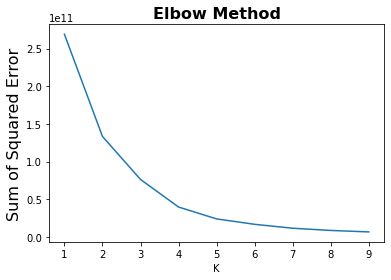

In [24]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataset)
    sse.append(km.inertia_)

plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error', fontsize=16)
plt.title('Elbow Method', fontfamily='sans-serif', fontsize=16, fontweight="bold")

Seems like the best k value is two, lets validate using silhouette method

**Silhouette Method**

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
sil = []
kmax_rng = range(2, 10)

# minimum number of clusters should be 2
for k in kmax_rng:
    kmeans = KMeans(n_clusters = k).fit(dataset)
    labels = kmeans.labels_
    sil.append(silhouette_score(dataset, labels, metric = 'euclidean'))

Text(0.5, 1.0, 'Silhouette Method')

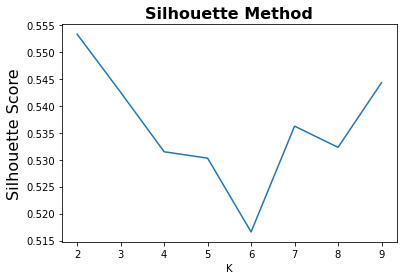

In [27]:
plt.plot(kmax_rng, sil)
plt.xlabel('K')
plt.ylabel('Silhouette Score', fontsize=16)
plt.title('Silhouette Method', fontfamily='sans-serif', fontsize=16, fontweight="bold")

The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.

**Clustering**

In [28]:
# Modeling
model = KMeans(n_clusters=2)
y_pred = model.fit_predict(dataset)

# add cluster to new column
df['cluster'] = y_pred

C:\Users\THALIB~1\AppData\Local\Temp/ipykernel_9536/362203303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = y_pred


In [29]:
df['cluster'].value_counts()

0    171
1     80
Name: cluster, dtype: int64

In [30]:
df = df.reset_index(drop=True)

In [31]:
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,2002,Speak Your Mind (Deluxe),Anne-Marie,2018-04-27,186986,82,0.03720,0.697,0.683,0.000000,0.1370,-2.881,0.1170,96.133,4,0
1,2U (feat. Justin Bieber),7,David Guetta,2018-09-14,194893,62,0.23400,0.534,0.613,0.000000,0.2270,-7.410,0.0591,144.878,4,0
2,7 Years,Lukas Graham (Blue Album),Lukas Graham,2015-06-16,237300,52,0.29000,0.742,0.479,0.000000,0.3910,-5.830,0.0551,119.951,4,1
3,7 rings,"thank u, next",Ariana Grande,2019-02-08,178626,85,0.59200,0.778,0.317,0.000000,0.0881,-10.732,0.3340,140.048,4,0
4,A Sky Full of Stars,Ghost Stories,Coldplay,2014-05-19,267866,78,0.00617,0.545,0.675,0.001970,0.2090,-6.474,0.0279,124.970,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,You Say,Look Up Child,Lauren Daigle,2018-09-07,274693,76,0.68200,0.494,0.632,0.000000,0.0869,-6.890,0.0342,147.873,4,1
247,Youngblood,Youngblood (Deluxe),5 Seconds of Summer,2018-06-15,203417,81,0.01690,0.596,0.854,0.000000,0.1240,-5.114,0.4630,120.274,4,0
248,Your Song,Phoenix (Deluxe Edition),Rita Ora,2018-11-23,180160,64,0.13300,0.853,0.571,0.000000,0.0564,-5.845,0.0543,117.991,4,0
249,no tears left to cry,Sweetener,Ariana Grande,2018-08-17,205920,79,0.04000,0.699,0.713,0.000003,0.2940,-5.507,0.0594,121.993,4,0


<Figure size 864x864 with 0 Axes>

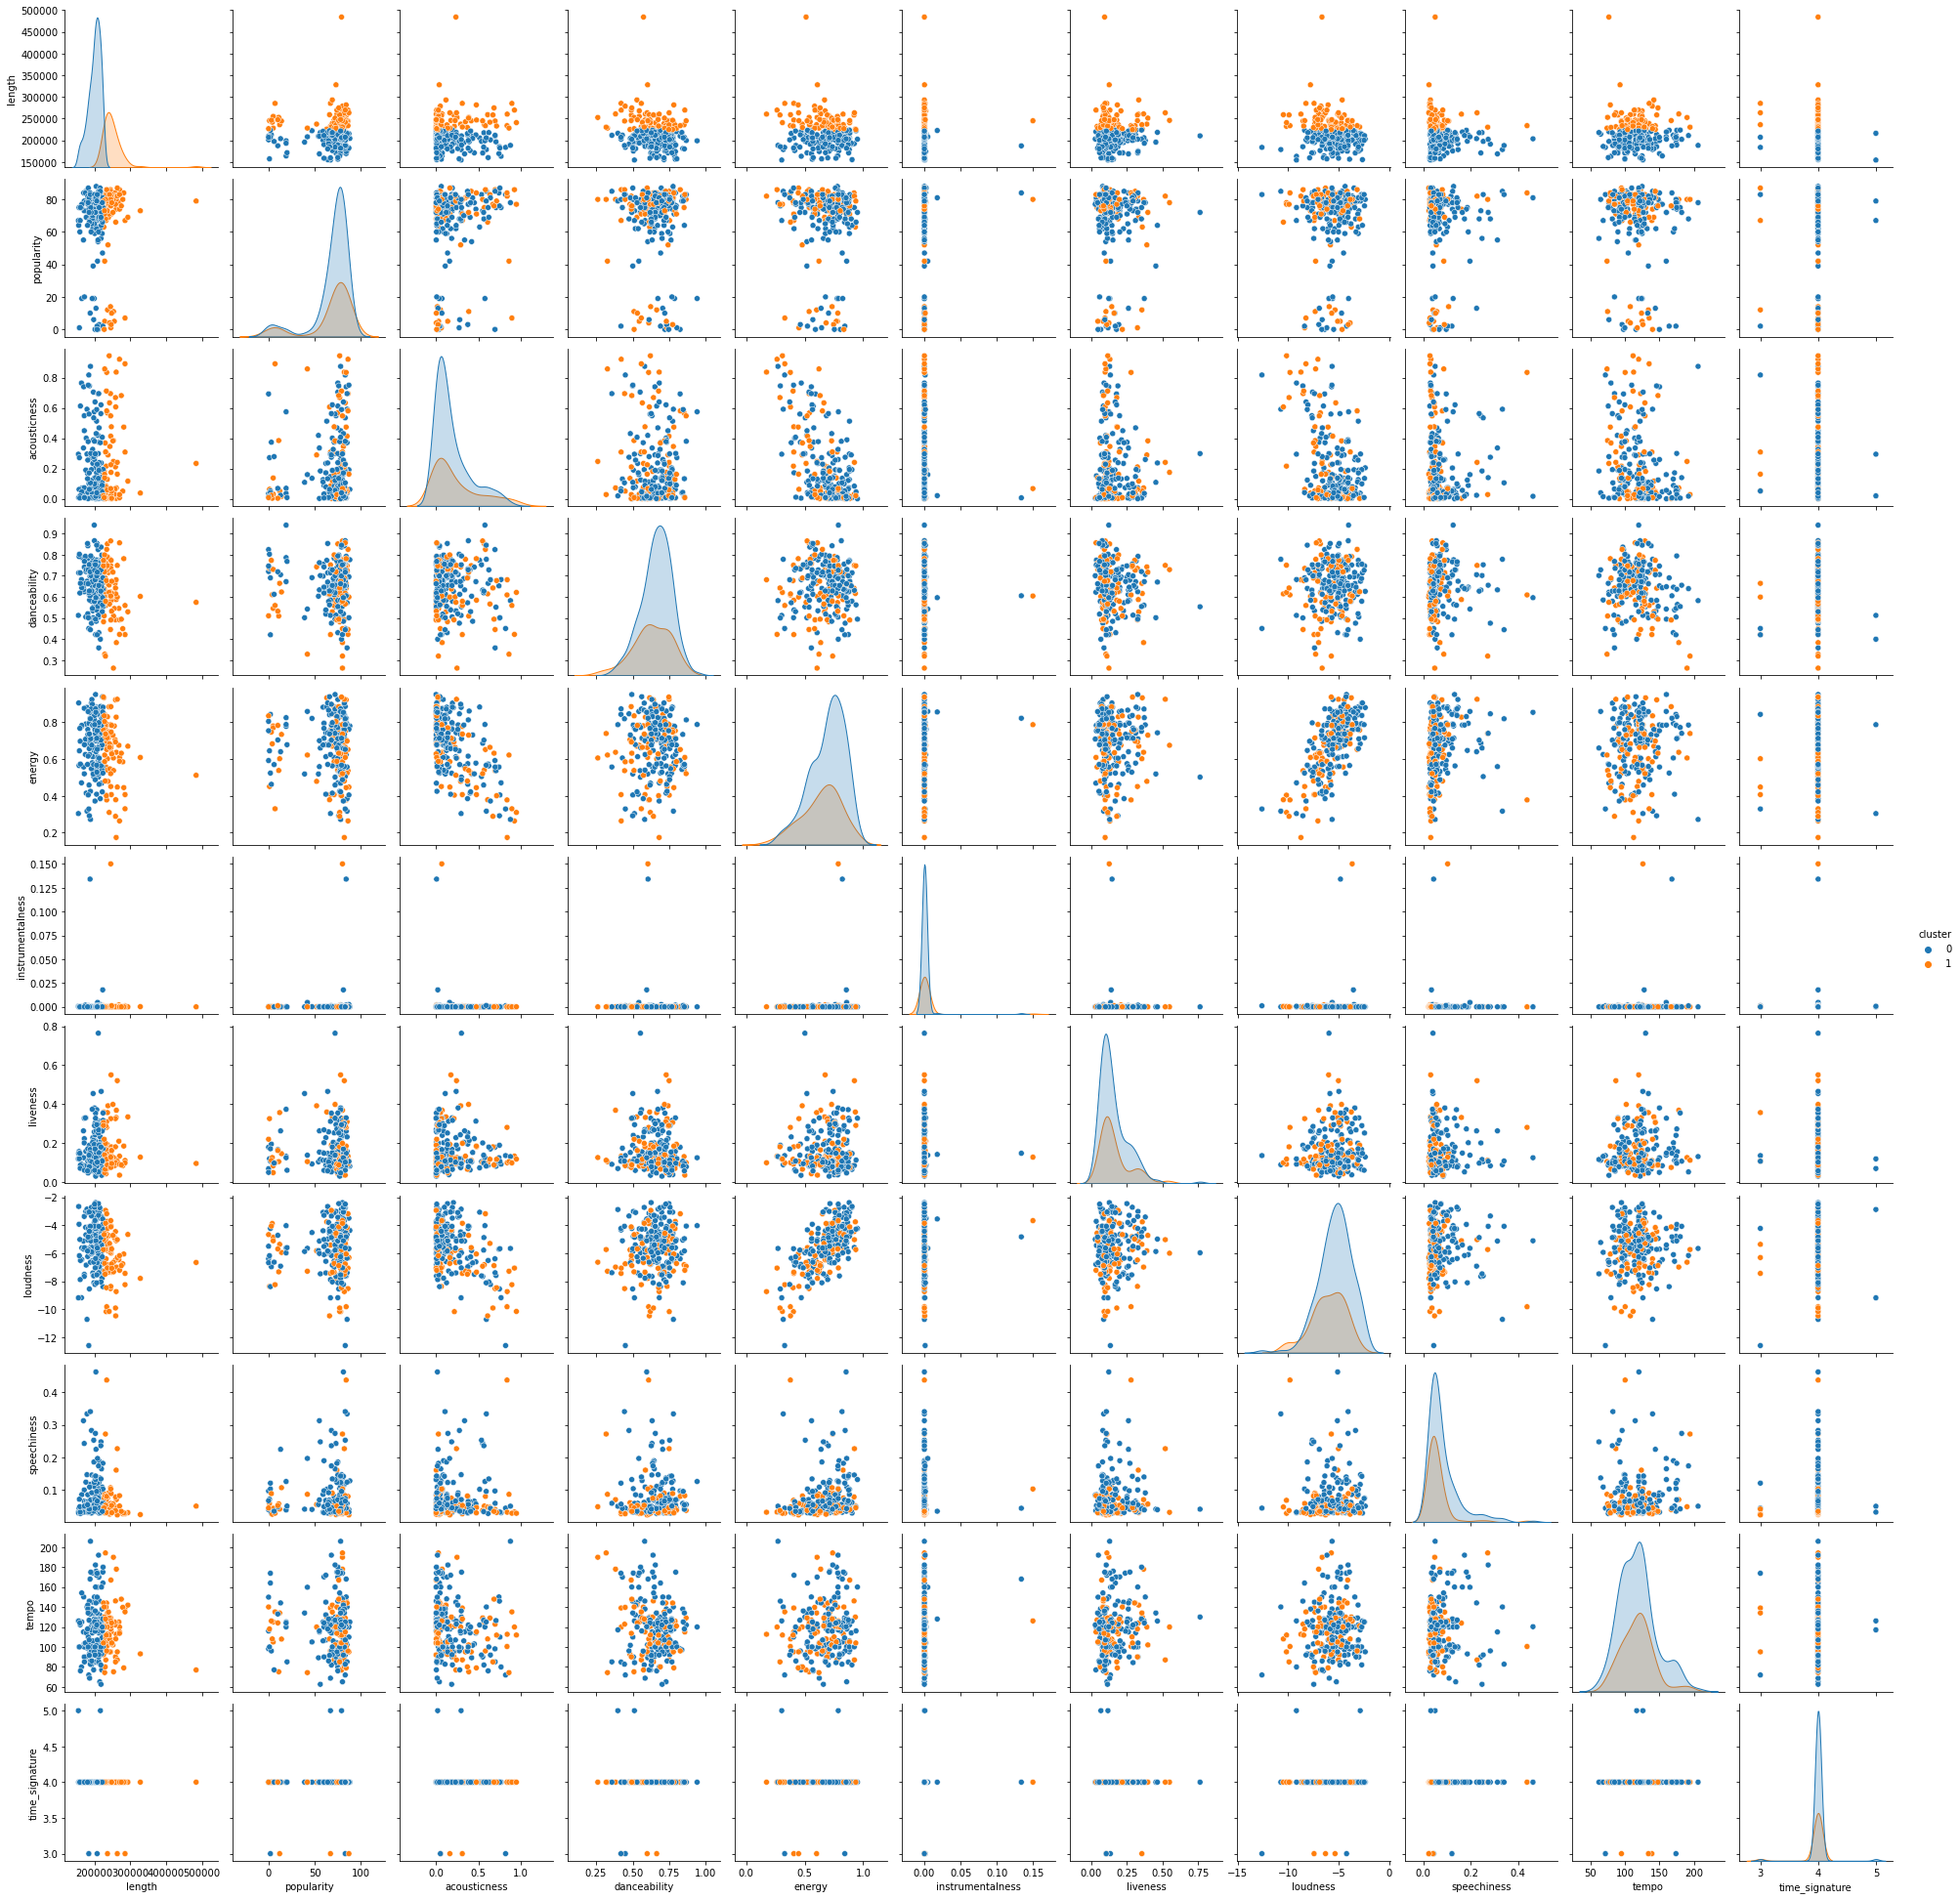

In [32]:
plt.figure(figsize=(12,12))
sns.pairplot(data=df, hue='cluster')

**Identify the clusters**

In [33]:
grouped_df = df.groupby('cluster')

In [34]:
mean_df = grouped_df.mean()

In [35]:
mean_df = mean_df.reset_index()

In [36]:
mean_df

,cluster,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,199169.619883,68.918129,0.185273,0.661222,0.693251,0.000989,0.155746,-5.360053,0.081198,118.155275,4.0000
1,1,249048.987500,67.000000,0.235236,0.630238,0.641500,0.001972,0.166233,-6.080950,0.059533,117.592000,3.9625


**Conclusion**

Both cluster 0 and 1 have similar characteristic, maybe you have to use specific playlist e.g. rock playlist, pop, etc to get a clear different of each clusters. Thats why our elbow and validation using silhouette only give us two clusters, because its similar song.